Завантажте датасет і збережіть його у *.CSV форматі.
Рекомендовані вимоги до набору даних:
Наявність кількох стовпців числового формату.
Як мінімум один категоріальний стовпець (тип "category" або "object").
Якщо набір містить більше 1000 рядків, скопіюйте перших 1000 рядків для
подальшої роботи.

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Завантаження даних
Завантажте обраний dataset у Python за допомогою Pandas.
Переконайтесь, що дані успішно завантажені та відображаються коректно.

In [181]:
df_winner = pd.read_csv("./datasets/match_winner_data_version1.csv")
df_loser = pd.read_csv("./datasets/match_loser_data_version1.csv")

2. Розвідувальний аналіз даних (EDA)
Ознайомтесь з даними:

Опишіть змінні, їх типи та статистичні характеристики 
(середнє значення, медіана, стандартне відхилення тощо).
Візуалізуйте дані за допомогою гістограм.
Виявлення проблем:

Відсутні значення:
Якщо відсутніх значень немає, видаліть випадковим чином 1% значень
для числових стовпців, імплементувавши для цього окрему функцію в межах відповідного класу.
Викиди (outliers):
Якщо викидів немає, додайте декілька викидів у числовий стовпець
(за допомогою спеціальної функції в класі).
Категоріальні змінні:
Якщо категоріальних стовпців немає, додайте такий стовпець та заповніть
його значеннями на основі аналізу інших стовпців.

In [182]:
df_winner.shape

(108829, 18)

In [183]:
df_winner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            108829 non-null  int64  
 1   teamId                108829 non-null  int64  
 2   win                   108829 non-null  object 
 3   firstBlood            108829 non-null  bool   
 4   firstTower            108829 non-null  bool   
 5   firstInhibitor        108829 non-null  bool   
 6   firstBaron            108829 non-null  bool   
 7   firstDragon           108829 non-null  bool   
 8   firstRiftHerald       108829 non-null  bool   
 9   towerKills            108829 non-null  int64  
 10  inhibitorKills        108829 non-null  int64  
 11  baronKills            108829 non-null  int64  
 12  dragonKills           108829 non-null  int64  
 13  vilemawKills          108829 non-null  int64  
 14  riftHeraldKills       108829 non-null  int64  
 15  

In [184]:
df_winner.describe()

,Unnamed: 0,teamId,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,gameId
count,108829.00000,108829.000000,108829.000000,108829.000000,108829.000000,108829.000000,108829.000000,108829.000000,108829.0,1.088290e+05
mean,54414.00000,150.385467,6.659999,1.179805,0.491156,1.952503,0.000055,0.811401,0.0,4.171699e+09
std,31416.37056,49.998744,2.698072,0.953246,0.620320,1.283247,0.008574,0.742589,0.0,9.208756e+07
min,0.00000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.190375e+09
25%,27207.00000,100.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,4.144889e+09
50%,54414.00000,200.000000,7.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.0,4.198886e+09
75%,81621.00000,200.000000,9.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.0,4.227870e+09
max,108828.00000,200.000000,11.000000,10.000000,5.000000,7.000000,2.000000,2.000000,0.0,4.261013e+09


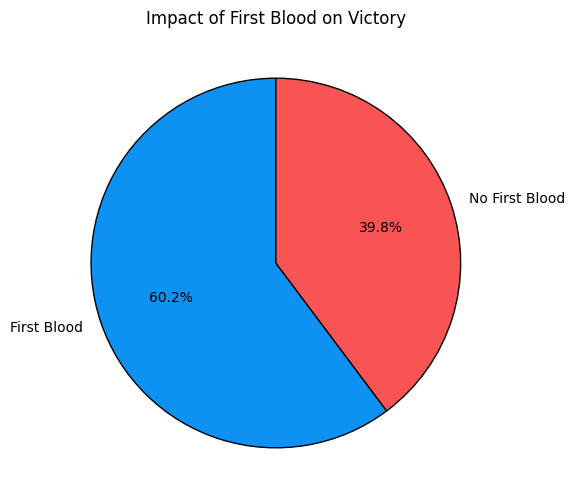

In [185]:
first_blood_counts = df_winner["firstBlood"].value_counts()
labels = ["First Blood", "No First Blood"]
colors = ["#0D92F4", "#F95454"]

plt.figure(figsize=(6, 6))
plt.pie(first_blood_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors)
plt.title("Impact of First Blood on Victory")

plt.show()

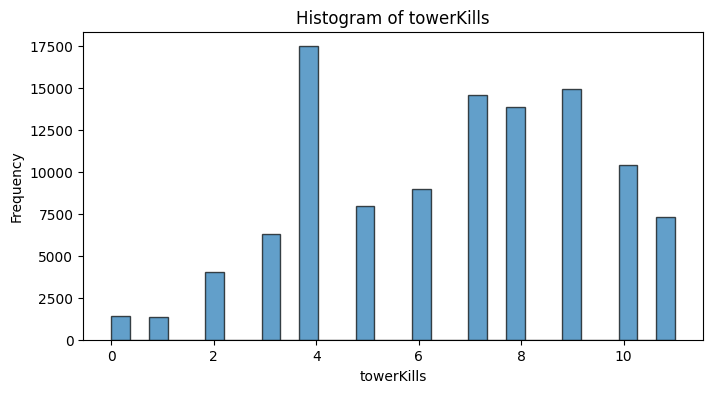

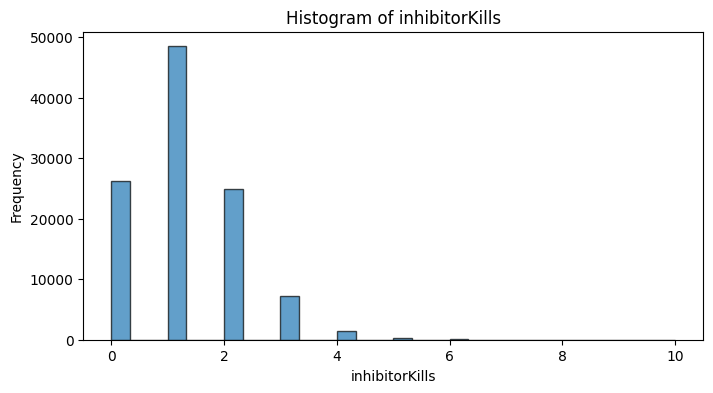

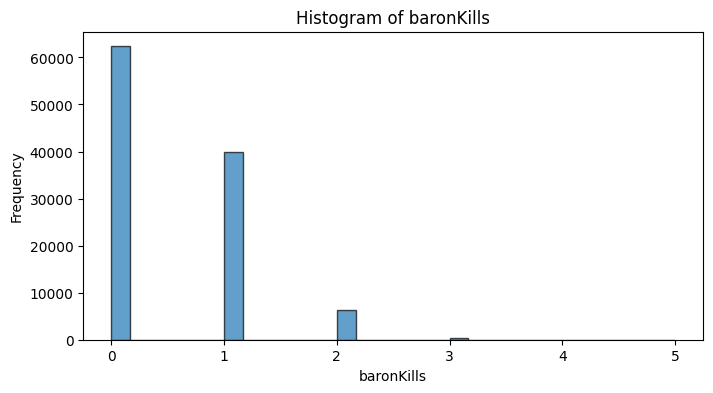

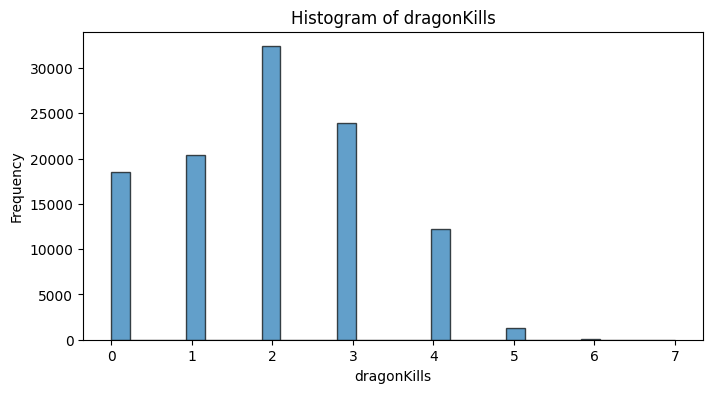

In [186]:
stats_columns = df_winner[["towerKills", "inhibitorKills", "baronKills", "dragonKills"]]

for col in stats_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_winner[col], bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [187]:
print(df_loser.isna().sum().any())

True


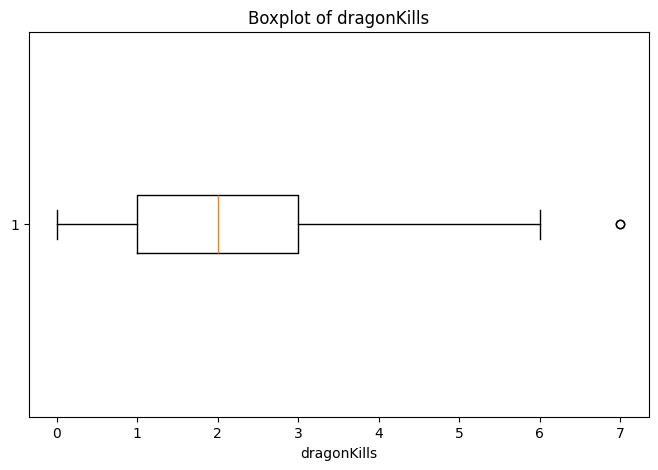

In [188]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_winner["dragonKills"], vert=False)
plt.title("Boxplot of dragonKills")
plt.xlabel("dragonKills")
plt.show()

In [189]:
df_winner_filtered = df_winner[df_winner["dragonKills"] <= 6]

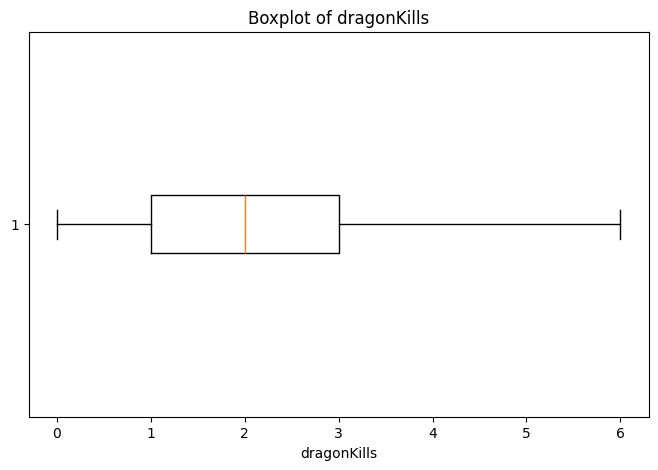

In [190]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_winner_filtered["dragonKills"], vert=False)
plt.title("Boxplot of dragonKills")
plt.xlabel("dragonKills")
plt.show()

In [191]:
def categorize_performance(row):
    score = row["towerKills"] + row["inhibitorKills"] + row["baronKills"] + row["dragonKills"] + row["riftHeraldKills"]
    if score >= 10:
        return "High"
    elif score >= 5:
        return "Medium"
    else:
        return "Low"

df_winner["teamPerformance"] = df_winner.apply(categorize_performance, axis=1)
df_winner["teamPerformance"] = df_winner["teamPerformance"].astype("category")

df_loser["teamPerformance"] = df_loser.apply(categorize_performance, axis=1)
df_loser["teamPerformance"] = df_loser["teamPerformance"].astype("category")

winner_team_performance_counts = df_winner["teamPerformance"].value_counts()
looser_team_performance_counts = df_loser["teamPerformance"].value_counts()


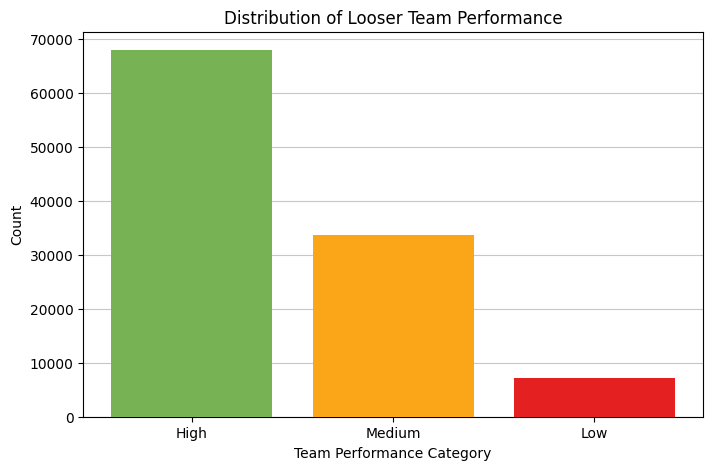

In [192]:
colors = ['#77B254', '#FBA518', '#E52020']

plt.figure(figsize=(8, 5))
plt.bar(winner_team_performance_counts.keys(), winner_team_performance_counts.values, color=colors, zorder=3)
plt.xlabel("Team Performance Category")
plt.ylabel("Count")
plt.title("Distribution of Looser Team Performance")
plt.grid(axis="y", alpha=0.7)

plt.show()

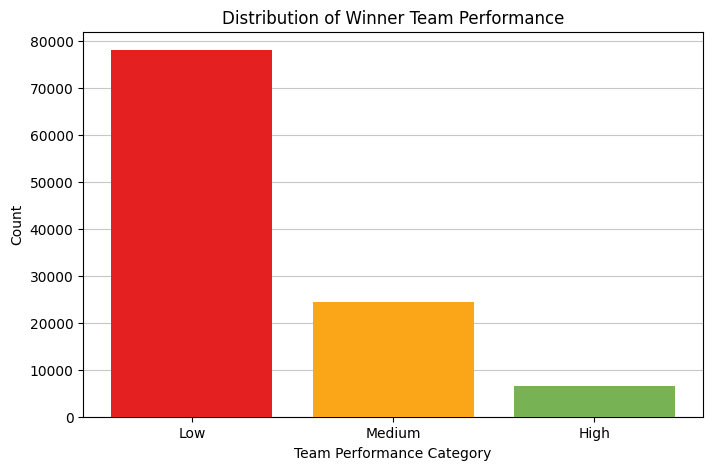

In [193]:
colors = ['#E52020', '#FBA518', '#77B254']

plt.figure(figsize=(8, 5))
plt.bar(looser_team_performance_counts.keys(), looser_team_performance_counts.values, color=colors, zorder=3)
plt.xlabel("Team Performance Category")
plt.ylabel("Count")
plt.title("Distribution of Winner Team Performance")
plt.grid(axis="y", alpha=0.7)

plt.show()

3. Обробка відсутніх значень
Оберіть стратегію обробки відсутніх значень:
Видалення
Заповнення середнім, медіаною або модою
Обґрунтуйте свій вибір.
Реалізуйте обрану стратегію за допомогою Pandas.

In [ ]:
df_loser = df_loser.dropna()
print(df_loser.isna().sum().any())

4. Кодування категоріальних змінних
Оберіть метод кодування:
One-hot encoding
Label encoding
Обґрунтуйте свій вибір.
Реалізуйте обраний метод за допомогою Pandas.

5. Масштабування функцій
Оберіть метод масштабування числових змінних:
MinMaxScaler
StandardScaler
Обґрунтуйте свій вибір.
Реалізуйте обраний метод за допомогою Pandas.

6. Розділення даних на навчальний та тестовий набір
Розділіть дані у співвідношенні 80/20 або 70/30.
Загальні рекомендації:
Створіть класи для кожного етапу обробки даних:
Клас для завантаження даних.
Клас для обробки відсутніх значень.
Клас для кодування категоріальних змінних тощо.
Кожен клас повинен містити методи для виконання відповідних операцій.
Використовуйте ООП для організації коду та підвищення його читабельності та
масштабованості.
Завдання ч.2 (додаткове)
По аналогії до функції process_data_titanic
(де кожен клас працює з вихідною таблицею, а зміни не накопичуються)
імплементувати універсальний метод process_data_custom,
у якому зміни повинні накопичуватися.
Ця функція повинна використовувати методи класів для обробки
довільного набору даних.
Якщо немає числових або категоріальних стовпців, імплементуйте
функціонал для їх автоматичного додавання.
Формат звіту:
Звіт повинен містити:

Код програми на Python із коментарями та обґрунтуваннями.
